In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import dask.dataframe as dd
# import dask
# df = dd.read_csv('/data/shya6478/filtered/1/data1.json_718.csv')#.dropna(axis=0, subset=['tweet_in_reply_to_user_id'])

In [ ]:
https://networkx.github.io/documentation/stable/auto_examples/index.html

## Note: This object "reply_count" is only available with the Premium and Enterprise tier products.

In [3]:
df = pd.read_csv('/data/shya6478/all.csv')

In [4]:
df.head(4)

,tweet_id,tweet_text,tweet_tags,tweet_created_at,tweet_in_reply_to_status_id,tweet_in_reply_to_user_id,place_id,place_country,place_name,user_id,user_name,user_friends_count,user_favourites_count,user_created_at,user_verified,user_statuses_count,user_followers_count
0,1212148237383155700,potential beneficial effects of vitamin d in c...,NaN,2019-12-31 23:07:15,NaN,NaN,01b7d0dd56f20858,EC,Pedernales,204198030,MarcoAlbuja,1263,47443,Mon Oct 18 04:20:24 +0000 2010,False,101876,8818
1,1212148652413792300,expedited tr band removal for transradial appr...,NaN,2019-12-31 23:08:54,NaN,NaN,01a9a39529b27f36,US,Manhattan,973196899,AbhiKumar47,644,2595,Tue Nov 27 03:36:12 +0000 2012,False,1015,1274
2,1212148801122816000,not kissing shit but coronas tonight,NaN,2019-12-31 23:09:29,NaN,NaN,00d511d335cd9fb6,US,Alafaya,3932068095,Ayaniortiz,446,5242,Sun Oct 11 23:49:15 +0000 2015,False,7558,846
3,1212487253391376400,NaN,NaN,2020-01-01 21:34:22,1.212487e+18,1.557234e+09,27fbd5412c269208,US,Huntersville,314369542,TheRule8618,385,10292,Fri Jun 10 04:22:19 +0000 2011,False,22926,422


In [26]:
rpl = df.dropna(subset=['tweet_in_reply_to_user_id'])

In [32]:
rpl

,tweet_id,tweet_text,tweet_tags,tweet_created_at,tweet_in_reply_to_status_id,tweet_in_reply_to_user_id,place_id,place_country,place_name,user_id,user_name,user_friends_count,user_favourites_count,user_created_at,user_verified,user_statuses_count,user_followers_count
3,1212487253391376400,NaN,NaN,2020-01-01 21:34:22,1.212487e+18,1557234132,27fbd5412c269208,US,Huntersville,314369542,TheRule8618,385,10292,Fri Jun 10 04:22:19 +0000 2011,False,22926,422
7,1212499353543348200,must not like corona,NaN,2020-01-01 22:22:27,1.212451e+18,356436889,5f2ad2e8059e53c5,US,Burnsville,15258565,dswerdlick,373,1197,Fri Jun 27 22:28:18 +0000 2008,False,4773,38
11,1212509795913068500,NaN,NaN,2020-01-01 23:03:57,1.212507e+18,231305795,a592bd6ceb1319f7,US,San Diego,17079503,caerbannog666,1229,1822,Fri Oct 31 02:42:23 +0000 2008,False,18545,1407
12,1212510275246518300,i love new york !!!!,NaN,2020-01-01 23:05:51,1.212464e+18,193218534,d311ecb26cb1fdea,MX,Salvatierra,237358025,BettyDelasLomas,1469,9955,Wed Jan 12 17:21:51 +0000 2011,False,29620,727
13,1212512448093114400,NaN,NaN,2020-01-01 23:14:29,1.212359e+18,3410549585,a592bd6ceb1319f7,US,San Diego,17079503,caerbannog666,1229,1822,Fri Oct 31 02:42:23 +0000 2008,False,18545,1407
15,1212513385880797200,NaN,NaN,2020-01-01 23:18:13,1.212359e+18,3410549585,a592bd6ceb1319f7,US,San Diego,17079503,caerbannog666,1229,1822,Fri Oct 31 02:42:23 +0000 2008,False,18546,1407
19,1212522345883197400,still thinking of mine!,NaN,2020-01-01 23:53:49,1.212515e+18,816267355,7142eb97ae21e839,US,Georgia,386158867,Nakoman1970,117,4780,Thu Oct 06 19:23:33 +0000 2011,False,2843,60
24,1212529785114648600,thanks for the help! we just got the call. and...,NaN,2020-01-02 00:23:23,1.212466e+18,1045773514479939584,4ec01c9dbc693497,US,Florida,257312141,mtthwfrr,711,1439,Fri Feb 25 04:33:15 +0000 2011,False,1463,242
35,1212541137073954800,very pretty pictures,NaN,2020-01-02 01:08:29,1.212248e+18,3033962028,3df4f427b5a60fea,US,San Antonio,59006906,msolisuiw,5001,55354,Wed Jul 22 02:28:06 +0000 2009,False,23966,249
41,1212554898077651000,"i want to quit smoking, and lose at least pounds",NaN,2020-01-02 02:03:10,1.212448e+18,97558780,01c77c227d4ab0d5,US,North Las Vegas,89454501,djpandafunk,778,126,Thu Nov 12 14:15:11 +0000 2009,False,2189,260


In [31]:
rpl.tweet_in_reply_to_user_id = rpl['tweet_in_reply_to_user_id'].fillna(0.0).astype(int)
# rpl['tweet_in_reply_to_status_id'] = rpl['tweet_in_reply_to_status_id'].astype(int)

In [171]:
# df['tweet_id'] = df['tweet_id'].astype(float)
## df['tweet_in_reply_to_user_id'] = df['tweet_in_reply_to_user_id'].fillna(0.0).astype(int)
## df['tweet_in_reply_to_status_id'] = df['tweet_in_reply_to_status_id'].fillna(0.0).astype(int)
# print(type(df.loc[3]['tweet_in_reply_to_status_id']), type(df.loc[3]['tweet_id']))

In [33]:
grouped = rpl.groupby(["tweet_in_reply_to_user_id"])

In [34]:
grouped.count().count()[1] #nr of users who get replies

146099

In [35]:
count = grouped.count()['tweet_created_at']
count.sort_values(ascending= False)

tweet_in_reply_to_user_id
25073877               8295
14292054               1215
216299334               961
759251                  765
3131144855              749
170699708               719
822215673812119552      651
25029495                592
38751027                475
232268199               471
7587032                 438
822215679726100480      438
612473                  383
939091                  379
15764644                375
2836421                 359
19825835                336
1917731                 329
1445650784              323
41634520                315
50769180                313
288277167               294
14499829                288
19739126                267
1944466748              256
78523300                254
17980523                248
292929271               236
375687601               233
39344374                229
                       ... 
1528538665                1
1528484880                1
1180111478017409024       1
1525716654            

In [23]:
count.mean() # average number of replies that got atleast one reply

1.9633467717095943

In [97]:
threshold = 200

In [98]:
count[count>threshold].count()

44

In [99]:
ol = count[count>threshold].index #users which got more than <threshold> replies

In [100]:
df[df.user_id.isin(ol)].count()[0] #nr of tweets these top users generated

3092

In [101]:
reply_to_ol = df[df.tweet_in_reply_to_user_id.isin(ol)]

In [102]:
reply_to_ol.count()[0] #nr of replies to their tweets

24216

In [103]:
reply_to_ol.tweet_in_reply_to_user_id = reply_to_ol['tweet_in_reply_to_user_id'].astype(int)

In [104]:
g = nx.from_pandas_edgelist(df=reply_to_ol, source='user_id', target='tweet_in_reply_to_user_id')#.to_directed()
graph_pos = nx.spring_layout(g)

In [106]:
g

In [ ]:
# nx.draw(g)

In [107]:
import operator

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(), key=operator.itemgetter(1))


degree_centrality = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_centrality)
print ('-------------Degree Centrality-------------')
print ('Highest degree:', degree_sorted[-5:])


-------------Degree Centrality-------------
Highest degree: [(759251, 0.04323799566873273), (3131144855, 0.04629975356582779), (170699708, 0.04883877230976028), (216299334, 0.05899484728549025), (25073877, 0.36853110297961317)]


In [114]:
betweenness = nx.betweenness_centrality(g)
betweenness_sorted = centrality_sort(betweenness)
print ('-------------Betweenness Centrality-------------')
print ('Highest betweenness:', betweenness_sorted[-5:])


-------------Betweenness Centrality-------------
Highest betweenness: [(759251, 0.0666905414251984), (3131144855, 0.08011654912682169), (170699708, 0.08280826024618643), (216299334, 0.10506290422785626), (25073877, 0.660924161136114)]


In [108]:
closeness = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness)
print ('-------------Closeness Centrality-------------')
print ('Highest closeness:', closeness_sorted[-5:])

-------------Closeness Centrality-------------
Highest closeness: [(29110005, 0.34291350441118085), (1229462214110859300, 0.3430892718600704), (990600637426618400, 0.3493567237847566), (5565532, 0.3537884272498768), (25073877, 0.4424430808972498)]


In [82]:
highest_degree = [node[0] for node in degree_sorted[-10:]]

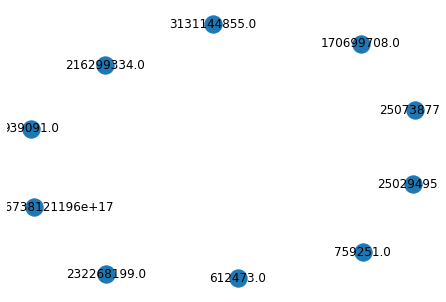

In [83]:
sub = g.subgraph(highest_degree)
nx.draw(sub, with_labels = True)

In [84]:
sub.degree()

DegreeView({8.222156738121196e+17: 0, 216299334.0: 0, 232268199.0: 0, 3131144855.0: 0, 939091.0: 0, 759251.0: 0, 25073877.0: 0, 25029495.0: 0, 612473.0: 0, 170699708.0: 2})

In [115]:
highest_bet = [node[0] for node in betweenness_sorted[-10:]]

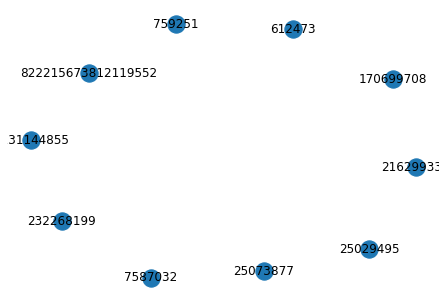

In [116]:
sub2 = g.subgraph(highest_bet)
nx.draw(sub2, with_labels=True)

In [117]:
sub2.degree()

DegreeView({822215673812119552: 0, 216299334: 0, 232268199: 0, 3131144855: 0, 759251: 0, 25073877: 0, 25029495: 0, 7587032: 0, 612473: 0, 170699708: 2})

In [118]:
highest_close = [node[0] for node in closeness_sorted[-10:]]

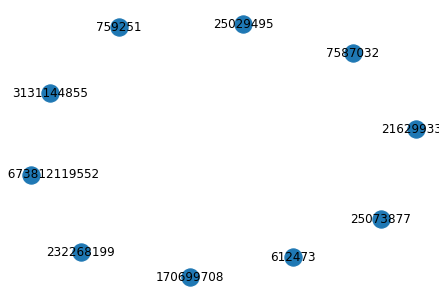

In [119]:
sub3 = g.subgraph(highest_bet)
nx.draw(sub3, with_labels=True)

In [120]:
sub3.degree()

DegreeView({822215673812119552: 0, 216299334: 0, 232268199: 0, 3131144855: 0, 759251: 0, 25073877: 0, 25029495: 0, 7587032: 0, 612473: 0, 170699708: 2})

In [121]:
#Highest degree centrality
degree_sorted[-1:]


[(25073877, 0.36853110297961317)]

In [122]:
#lowest degree centrality
degree_sorted[:1]


[(34839183, 7.467702188036741e-05)]

In [123]:
 betweenness_sorted[-1:]   # highest betweenness centrality

[(25073877, 0.660924161136114)]

In [124]:
betweenness_sorted[:1]     # lowest betweenness centrality

[(34839183, 0.0)]

In [125]:
closeness_sorted[-1:]       # highest closeness centrality

[(25073877, 0.4424430808972498)]

In [126]:
closeness_sorted[:1]        # lowest closeness centrality

[(38751027, 0.0)]

In [136]:
g = g.to_directed()

In [138]:
# Run some degree centrality measures for directed graphs:
# in_degree_centrality(): number of incoming connections (number of people following you)
# out_degree_centrality(): number of outgoing connections (number of people you follow)

in_degree_centrality = nx.in_degree_centrality(g)
in_degree_sorted = sorted(in_degree_centrality.items(), key=operator.itemgetter(1))
print ('-------------In_Degree Centrality-------------')
print ('Highest in degree:', in_degree_sorted[-5:])
print ('Lowest in degree:', in_degree_sorted[:5])


-------------In_Degree Centrality-------------
Highest in degree: [(759251, 0.04323799566873273), (3131144855, 0.04629975356582779), (170699708, 0.048764095287879915), (216299334, 0.05899484728549025), (25073877, 0.36853110297961317)]
Lowest in degree: [(34839183, 7.467702188036741e-05), (20323347, 7.467702188036741e-05), (295387713, 7.467702188036741e-05), (3119912021, 7.467702188036741e-05), (824109200607428600, 7.467702188036741e-05)]


In [139]:
out_degree_centrality = nx.out_degree_centrality(g)
out_degree_sorted = sorted(out_degree_centrality.items(), key=operator.itemgetter(1))
print ('-------------Out_Degree Centrality-------------')
print ('Highest out degree:', out_degree_sorted[-5:])
print ('Lowest out degree:', out_degree_sorted[:5])

-------------Out_Degree Centrality-------------
Highest out degree: [(759251, 0.04323799566873273), (3131144855, 0.04629975356582779), (170699708, 0.048764095287879915), (216299334, 0.05899484728549025), (25073877, 0.36853110297961317)]
Lowest out degree: [(34839183, 7.467702188036741e-05), (20323347, 7.467702188036741e-05), (295387713, 7.467702188036741e-05), (3119912021, 7.467702188036741e-05), (824109200607428600, 7.467702188036741e-05)]


In [140]:
highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]

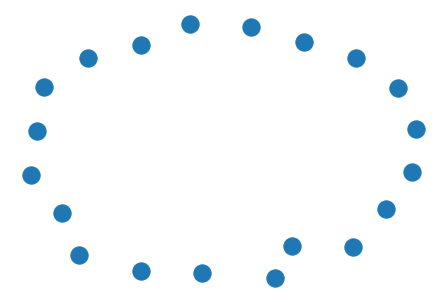

In [141]:
subin = g.subgraph(highest_in_degree)
nx.draw(subin)

In [142]:
subin.degree()


DiDegreeView({822215679726100480: 0, 822215673812119552: 0, 1917731: 0, 15764644: 0, 2836421: 0, 216299334: 0, 232268199: 0, 3131144855: 0, 170699708: 2, 19825835: 0, 288277167: 2, 939091: 0, 759251: 0, 14499829: 0, 25073877: 0, 25029495: 0, 41634520: 0, 612473: 0, 50769180: 0, 7587032: 0})

In [143]:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]



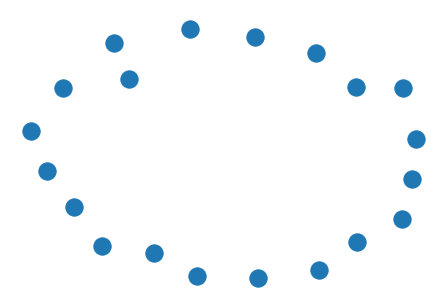

In [144]:
subout = g.subgraph(highest_out_degree)
nx.draw(subout)

In [145]:
subout.degree()


DiDegreeView({822215679726100480: 0, 822215673812119552: 0, 1917731: 0, 15764644: 0, 2836421: 0, 216299334: 0, 232268199: 0, 3131144855: 0, 170699708: 2, 19825835: 0, 288277167: 2, 939091: 0, 759251: 0, 14499829: 0, 25073877: 0, 25029495: 0, 41634520: 0, 612473: 0, 50769180: 0, 7587032: 0})

In [157]:
df[df.user_id==288277167].head(1)

,tweet_id,tweet_text,tweet_tags,tweet_created_at,tweet_in_reply_to_status_id,tweet_in_reply_to_user_id,place_id,place_country,place_name,user_id,user_name,user_friends_count,user_favourites_count,user_created_at,user_verified,user_statuses_count,user_followers_count
33576,1247866822252277800,trump on march on why he opposed funding for m...,NaN,2020-04-08 12:40:09,1.247864e+18,288277167.0,01fbe706f872cb32,US,Washington,288277167,atrupar,998,100039,Tue Apr 26 15:22:47 +0000 2011,True,72249,295899
